## **FAKE REVIEWS DETECTION**
### **INTRODUCTION**

Online reviews significantly influence consumer decision-making. However, the authenticity of these reviews is often questionable, with fake reviews being used to manipulate public opinion and sales. The dataset utilized in this project, sourced from [Hugging Face's Amazon Reviews 2023 dataset](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023), specifically from the **All_Beauty** category. This dataset includes detailed information such as ratings, review titles, review text, helpful votes, and whether the purchase was verified. By analyzing these features, this project aims to build a natural language processing (NLP) model that effectively identifies fake reviews and enhances trust in online platforms.

### **STAKEHOLDER IDENTIFICATION**

1. **E-commerce Platforms**: 
   - Detect and filter fake reviews to maintain customer trust and ensure accurate product feedback.
   - Use insights to improve platform reliability and foster consumer loyalty.

2. **Consumers**: 
   - Benefit from trustworthy reviews that reflect genuine user experiences.
   - Make informed purchasing decisions based on authentic feedback.

3. **Businesses**: 
   - Protect brand reputation from potential harm caused by misleading reviews.
   - Gain valuable insights into customer preferences and concerns through accurate reviews.

4. **Regulatory Bodies**: 
   - Monitor and manage the authenticity of online reviews to ensure ethical business practices.
   - Enforce compliance with guidelines against fraudulent activities.

### **PROJECT GOALS AND OBJECTIVES**

#### **OBJECTIVE**
The primary aim of this project is to develop an NLP-based model that identifies fake reviews with high accuracy. This involves analyzing textual patterns, behavioral features, and metadata to differentiate between genuine and fraudulent reviews.

#### **GOALS**

1. **Enhance Review Authenticity Detection**:
   - Build and train models to reliably classify reviews as real or fake.
   - Use metrics such as accuracy, precision, and recall to evaluate model performance.

2. **Advance NLP Techniques**:
   - Employ advanced preprocessing methods, including text tokenization, stopword removal, and lemmatization, to prepare textual data for analysis.
   - Use machine learning and natural language processing techniques such as TF-IDF and Logistic Regression to classify reviews.

3. **Facilitate Data Management**:
   - Leverage pandas and dataframes for organizing and preprocessing the dataset efficiently.
   - Explore patterns in metadata, such as helpful votes, verified purchase status, and timestamps, to identify distinguishing features of fake reviews.

4. **Promote Consumer Trust**:
   - Provide tools that platforms and consumers can use to assess the credibility of reviews.
   - Contribute to the overall integrity and reliability of e-commerce ecosystems.

### Import libraries

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score, roc_auc_score, log_loss, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from datasets import load_dataset
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4') 

from nltk.corpus import wordnet
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from textblob import TextBlob
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Data Understanding

The **Amazon-Reviews-2023** dataset, focusing on the **All_Beauty** category, contains 701,528 entries across 10 columns, offering detailed insights into customer feedback through features like review ratings, titles, text, helpful votes, and verification status. While the rating distribution shows 5-star reviews are the most frequent (420,726), followed by fewer 1-star (102,080), 4-star (79,381), 3-star (56,307), and 2-star (43,034) ratings, the dataset does not explicitly include labels or classes for classification tasks. Metadata like helpful votes and verified purchases enhances the potential for identifying fake reviews. The dataset is lightweight (48.8 MB) and includes fields suitable for natural language processing, such as review titles and text. This comprehensive dataset supports robust analysis and modeling for detecting fraudulent reviews.

In [2]:
# Load dataset
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

In [3]:
# Convert dataset to DataFrame
df = pd.DataFrame(dataset["full"])

df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [5]:
# Distribution of the 'rating' column
rating_counts = df['rating'].value_counts()

# Rating distribution
print("Rating distribution for 'rating' column:")
print(rating_counts)

Rating distribution for 'rating' column:
rating
5.0    420726
1.0    102080
4.0     79381
3.0     56307
2.0     43034
Name: count, dtype: int64


### Data Cleaning

1. Missing values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


2. Duplicates

In this section we need to confirm before removing any duplicates that the duplicates aren't valid duplicates eg a user having the same review foor different products or a product having the same review from different users. Therefore we check and flag down any invalid duplicates then compare with the original number of duplicates. If it is the same then remove duplicates else retain valid ones

In [7]:
# Exclude columns with unhashable type eg. 'images'
columns_to_check = [col for col in df.columns if col != 'images']

# Check for duplicates not including the original occurence
duplicates = df.duplicated(subset=columns_to_check).sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicates including the orriginal occurence
duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]
print(f"Total duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 7275
Total duplicate rows: 13413


In [8]:
# View duplicate rows for specific columns
duplicates[['user_id', 'rating', 'text', 'asin']].head(10)

,user_id,rating,text,asin
6565,AHT2QS6TYOXWKTNWDD63CMGOUZDQ,5.0,Great for the price.,B00NT0AR7E
6566,AHT2QS6TYOXWKTNWDD63CMGOUZDQ,5.0,Great for the price.,B00NT0AR7E
6713,AHLDHIVNLWLVRDISEB76TEMLOG2Q,5.0,Very pleasant smell and keeps ur skin Moist.,B00WDKPW9O
6714,AHLDHIVNLWLVRDISEB76TEMLOG2Q,5.0,Very Useful For Taking A Shower After My Opera...,B07VQZPHHF
6715,AHLDHIVNLWLVRDISEB76TEMLOG2Q,5.0,Very pleasant smell and keeps ur skin Moist.,B00WDKPW9O
6716,AHLDHIVNLWLVRDISEB76TEMLOG2Q,5.0,Very Useful For Taking A Shower After My Opera...,B07VQZPHHF
7090,AEKMLJQPUBHCKDDHKVC74DYKON6Q,5.0,Overall an amazing experience! The seller was ...,B09NBJJCM6
7091,AEKMLJQPUBHCKDDHKVC74DYKON6Q,5.0,Overall an amazing experience! The seller was ...,B09NBJJCM6
8008,AFERA3XEMMGZFV4HXB6LTVTZKNDQ,5.0,Since I am getting back into a more of an orga...,B01DH7KNZ4
8009,AFERA3XEMMGZFV4HXB6LTVTZKNDQ,5.0,Anyone knows-use acetone to remove the toughes...,B01AYTGWA8


In [9]:
def flag_invalid_duplicates(data):
    duplicates = data[data.duplicated(subset=columns_to_check, keep=False)]
    invalid = duplicates.groupby(['user_id', 'asin']).filter(lambda x: len(x) > 1 and x['text'].nunique() == 1)
    return invalid

# Flag invalid duplicates
invalid_duplicates = flag_invalid_duplicates(df)
print(f"Invalid duplicates found: {invalid_duplicates.shape[0]}")


Invalid duplicates found: 13413


In [10]:
# Drop the invalid duplicates (In this case it is all)
df = df.drop_duplicates(subset=columns_to_check)

In [11]:
# Check for duplicates not including the original occurence
duplicates = df.duplicated(subset=columns_to_check).sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicates including the orriginal occurence
duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]
print(f"Total duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0
Total duplicate rows: 0


3. Data Types

In [12]:
# Ensure correct data types
df.dtypes

rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object

4. Timestamp

In [13]:
# Convert timestamp to datetime
df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

C:\Users\HP\AppData\Local\Temp\ipykernel_7176\3368965757.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2020-05-05 14:08:48.923000', '2020-05-04 18:10:55.070000',
 '2020-05-16 21:41:06.052000', '2022-01-28 18:13:50.220000',
 '2020-12-30 10:02:43.534000', '2020-08-27 22:30:08.138000',
 '2021-09-17 13:31:59.443000', '2021-10-15 05:20:59.292000',
 '2021-07-27 13:04:04.559000', '2021-07-18 13:21:51.145000',
 ...
 '2022-02-26 02:36:57.902000', '2018-04-20 20:17:31.799000',
 '2022-05-19 17:08:15.379000',        '2015-06-06 01:09:19',
 '2020-04-09 18:02:48.241000',        '2016-11-04 02:37:01',
        '2016-12-05 03:32:10', '2020-05-27 02:52:54.067000',
        '2007-07-18 22:36:49',        '2013-04-26 02:48:06']
Length: 694253, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'], uni

5. Rating

In [14]:
# Validate 'rating' values (should be between 1 and 5)
invalid_ratings = df[~df['rating'].between(1.0, 5.0)]
print(f"Number of invalid ratings: {len(invalid_ratings)}")

Number of invalid ratings: 0


6. Heplful Vote

In [15]:
# Validate 'helpful_vote' column (should not be negative)
negative_votes = df[df['helpful_vote'] < 0]
print(f"Number of rows with negative helpful votes: {len(negative_votes)}")

Number of rows with negative helpful votes: 0


7. Text Preprocessing

In [16]:
# Check for invalid or empty text in 'title' or 'text'
df = df[df['title'].str.strip() != ''] 
df = df[df['text'].str.strip() != ''] 

# Preprocessing
df['verified_purchase'] = df['verified_purchase'].astype(int)  # Boolean to int
df['text_length'] = df['text'].apply(len)  # Feature Engineering

In [17]:
# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+|\+')

# Text preprocessing
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    
    # Remove special characters and numbers using regex
    tokens = tokenizer.tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    return ' '.join(tokens)

# Title preprocessing 
def preprocess_title(title):
    # Lowercase title
    title = title.lower()
    
    # Tokenize title using regex
    tokens = tokenizer.tokenize(title)
    
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Apply preprocessing to the 'title' column
df['cleaned_title'] = df['title'].apply(preprocess_title)

# Inspect the cleaned text and title
df[['title', 'cleaned_title', 'text', 'processed_text']].head()


,title,cleaned_title,text,processed_text
0,Such a lovely scent but not overpowering.,such a lovely scent but not overpowering,This spray is really nice. It smells really go...,spray really nice smell really good go really ...
1,Works great but smells a little weird.,works great but smells a little weird,"This product does what I need it to do, I just...",product need wish odorless soft coconut smell ...
2,Yes!,yes,"Smells good, feels great!",smell good feel great
3,Synthetic feeling,synthetic feeling,Felt synthetic,felt synthetic
4,A+,a +,Love it,love


### EDA
The insights received in this section is that the data is heavily skewed with a high number of ratings being 5 followed by 1. We also discover that alot of higher ratings are from unverified purchases in comparison to verified purchases which range from low to high and is distributed throughout. More helpful votes are for items with extremely high ratings or low ratings like 1,4 and 5. Key words in the title are five star and love and in the text are use, hair, love and product. We also confirm potential of data leakage using feature correlation heatmap and there is no data leakage

1. Rating Distribution

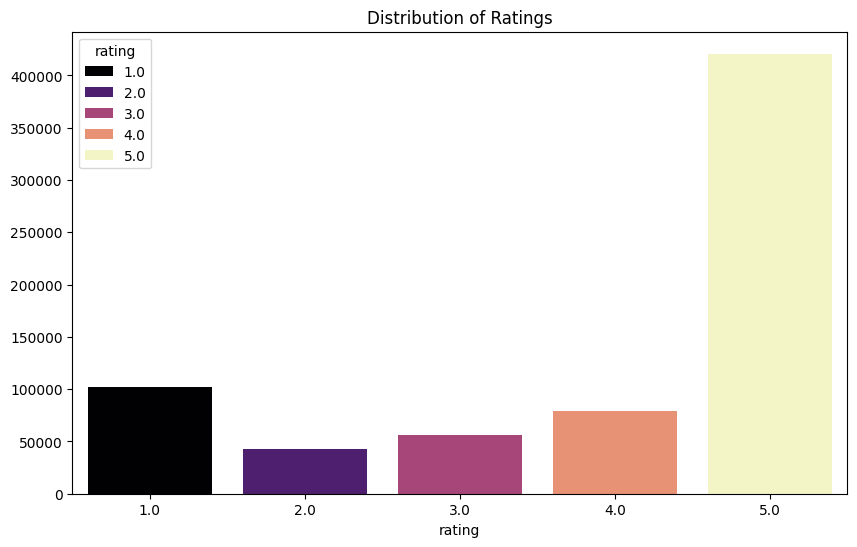

In [18]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Ratings')
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='magma')
plt.show()

2. Summary Statistics

In [19]:
df.describe()

,rating,timestamp,helpful_vote,verified_purchase,text_length
count,693548.000000,693548,693548.000000,693548.000000,693548.000000
mean,3.960861,2019-04-08 03:02:54.566915328,0.924396,0.905215,173.279030
min,1.000000,2000-11-01 04:24:18,0.000000,0.000000,1.000000
25%,3.000000,2017-08-01 01:08:19.196000,0.000000,1.000000,44.000000
50%,5.000000,2019-10-19 00:12:34.208499968,0.000000,1.000000,102.000000
75%,5.000000,2021-03-01 01:43:17.334749952,1.000000,1.000000,209.000000
max,5.000000,2023-09-09 00:39:36.666000,646.000000,1.000000,14989.000000
std,1.493854,NaN,5.489685,0.292918,247.235218


3.  Verified Purchase vs Rating

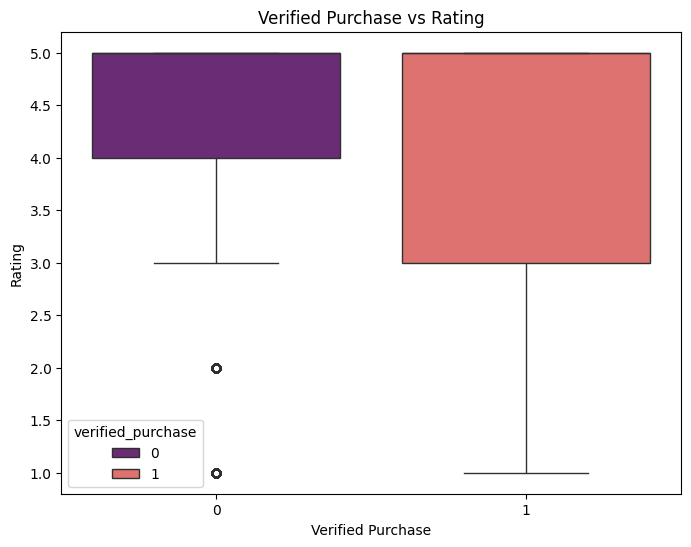

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='verified_purchase', y='rating', data=df, hue='verified_purchase', palette='magma')
plt.title('Verified Purchase vs Rating')
plt.xlabel('Verified Purchase')
plt.ylabel('Rating')
plt.show()

4. Average Helpful Votes vs Rating

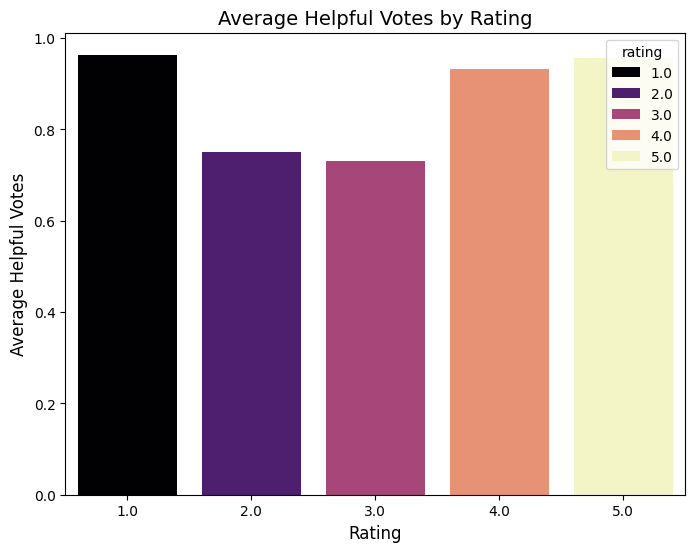

In [21]:
avg_helpful_votes = df.groupby('rating')['helpful_vote'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='rating', y='helpful_vote', data=avg_helpful_votes, hue='rating', palette='magma')
plt.title('Average Helpful Votes by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Helpful Votes', fontsize=12)
plt.show()

5. Average Helpful Votes Vs Verified and Unverified purchases

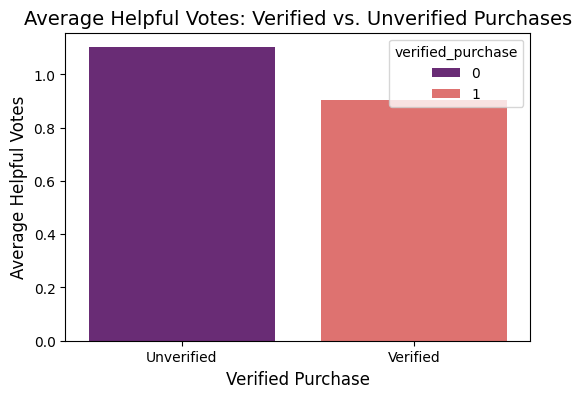

In [22]:
helpful_verified = df.groupby('verified_purchase')['helpful_vote'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='verified_purchase', y='helpful_vote', data=helpful_verified, hue='verified_purchase', palette='magma')
plt.title('Average Helpful Votes: Verified vs. Unverified Purchases', fontsize=14)
plt.xlabel('Verified Purchase', fontsize=12)
plt.ylabel('Average Helpful Votes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Unverified', 'Verified'], rotation=0)
plt.show()

6. Word Cloud for Title

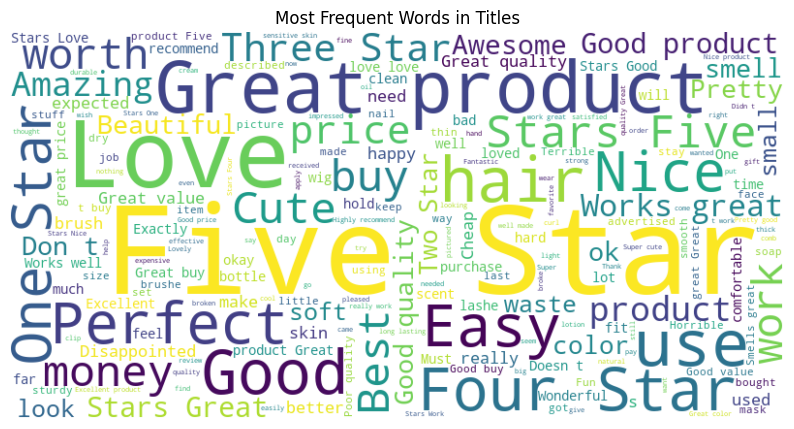

In [23]:
title_text = ' '.join(df['title'].dropna())
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(10, 8))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Titles')
plt.axis('off')
plt.show()

7. Word Cloud for Text

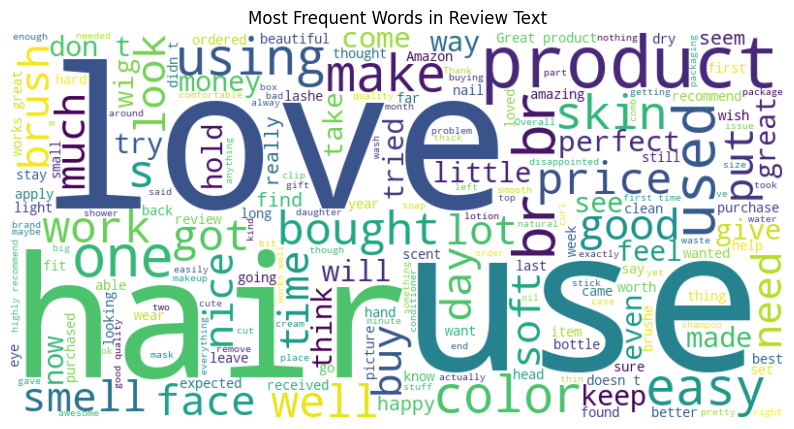

In [24]:
review_text = ' '.join(df['text'].dropna())
review_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
plt.figure(figsize=(10, 8))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Review Text')
plt.axis('off')
plt.show()

8. Feature Correlation Heatmap

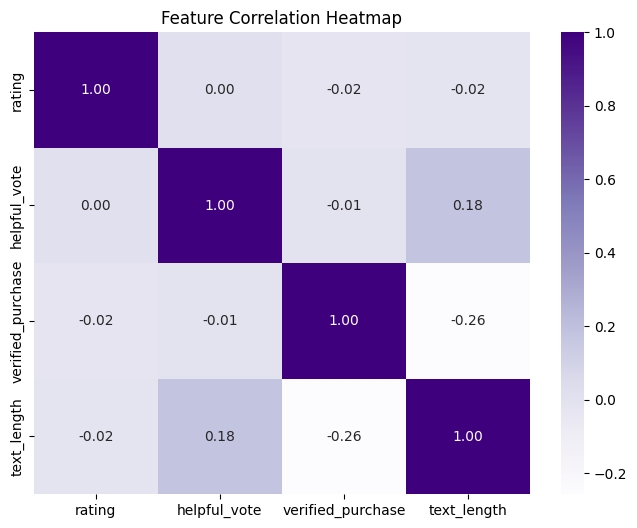

In [25]:
# Numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Purples", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Feature Selection and Modelling

In [26]:
# Features and Target
X = df[['rating', 'text', 'helpful_vote', 'verified_purchase', 'text_length']]
y = (df['helpful_vote'] > 0).astype(int)  


In [27]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [28]:
# Text vectorization and preprocessing pipeline
text_preprocessor = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100000, stop_words='english'))
])

preprocessor = ColumnTransformer([
    ('text', text_preprocessor, 'text'),
    ('num', StandardScaler(), ['rating', 'helpful_vote', 'text_length']),
    ('pass', 'passthrough', ['verified_purchase'])
])

In [29]:
# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced'))
])

In [30]:
# Training
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=100000,
                                                                                   stop_words='english'))]),
                                                  'text'),
                                                 ('num', StandardScaler(),
                                                  ['rating', 'helpful_vote',
                                                   'text_length']),
                                                 ('pass', 'passthrough',
                                                  ['verified_purchase'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

### Evaluation Metrics

In [31]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9999927907144402
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203018
           1       1.00      1.00      1.00     74402

    accuracy                           1.00    277420
   macro avg       1.00      1.00      1.00    277420
weighted avg       1.00      1.00      1.00    277420



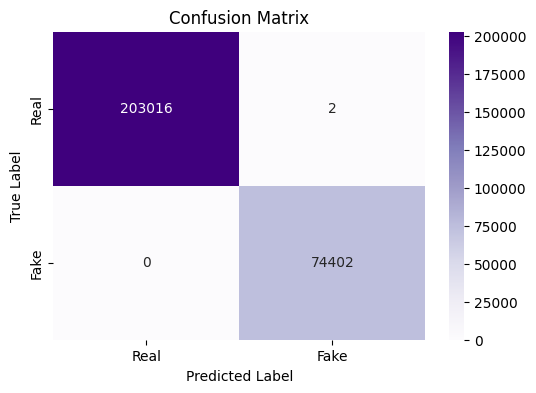

In [32]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [33]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")


Training Accuracy: 1.000000
Test Accuracy: 0.999993


### Saving Model and Vectorizer

In [39]:
# Save Logistic Regression model
with open('model/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save TF-IDF vectorizer
with open('model/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(model.named_steps['preprocessor'].named_transformers_['text'].named_steps['tfidf'], file)